In [3]:
import pandas as pd
import sys

sys.path.append('/home/bikash/Documents/Solubility/For_upload/Solubility/')

import functions

In [16]:
#Datasets
pET = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('/home/bikash/Documents/Solubility/For_upload/Solubility/results/ecoli.pkl.gz', compression='infer')

In [17]:
#Datasets
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])

In [25]:
camsol_pET21 = pd.read_csv('CamSol_intrinsic_pET21_NESG.txt', sep='\t', header=None)
camsol_pET15 = pd.read_csv('CamSol_intrinsic_pET15_NESG.txt', sep='\t', header=None)
camsol_ecoli = pd.read_csv('CamSol_intrinsic_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
camsol_pET = pd.concat([camsol_pET15, camsol_pET21])


#Rename cols
camsol_pET = camsol_pET.rename(columns={0:'Accession', 1:'Score'})
camsol_ecoli = camsol_ecoli.rename(columns={0:'JW', 1:'Score'})

In [26]:
camsol_pET.shape, pET.shape, ecoli_w3110.shape, camsol_ecoli.shape

((16281, 2), (12216, 5), (3198, 5), (4311, 2))

In [27]:
#merge results with cleaned dataset
df_pET = pET.merge(camsol_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(camsol_ecoli, on="JW")

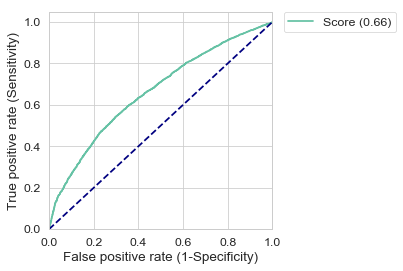

In [28]:
#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

In [29]:
#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

SpearmanrResult(correlation=0.43537181844707445, pvalue=4.5274663494369577e-148)

In [24]:
df_pET.shape, df_ecoli.shape

((12216, 6), (3198, 6))